In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def chebpoints(n):
    return np.cos(np.arange(n,dtype=np.float128)*np.pi/(n-1))

In [5]:
x = chebpoints(10)

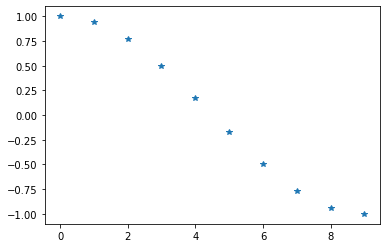

In [8]:
plt.plot(x,'*')

In [9]:
def Leja(n):
    # Leja Ordering Chebyshev nodes
    points = chebpoints(n + 1)[::-1]
    Points = points
    ord = np.arange(1, n + 1)

    LJ = np.zeros([1, n + 1])
    LJ[0] = 0
    M = 0

    for k in range(0, n):
        JJ = 0
        for i in range(0, n - k):
            P = 1
            for j in range(k + 1):
                idx_pts = int(LJ[0, j])
                P = P * (points[idx_pts] - points[ord[i]])
            P = np.abs(P)
            if (P >= M):
                JJ = i
                M = P
        M = 0
        LJ[0, k + 1] = ord[JJ]
        ord = np.delete(ord, JJ)

    Leja_Points = np.zeros([1, n + 1])
    for i in range(n + 1):
        Leja_Points[0, i] = Points[int(LJ[0, i])]
    return Leja_Points

In [16]:
def gen_points_lp(m, N, Points, Gamma):
    PP = np.zeros((m, N))
    for i in range(N):
        for j in range(m):
            PP[j,i] = Points[j, int(Gamma[j, i])]
    return PP

In [12]:
def Gamma_lp(m, n, gamma, gamma2, p):
        gamma0 = gamma.copy()
        gamma0[m - 1] = gamma0[m - 1] + 1

        norm = np.linalg.norm(gamma0.reshape(-1), p)
        if (norm < n and m > 1):
            o1 = Gamma_lp(m - 1, n, gamma.copy(), gamma.copy(), p)
            o2 = Gamma_lp(m, n, gamma0.copy(), gamma0.copy(), p)
            out = np.concatenate([o1, o2], axis=-1)
        elif (norm < n and m == 1):
            out = np.concatenate([gamma2, Gamma_lp(m, n, gamma0.copy(), gamma0.copy(), p)], axis=-1)
        elif (norm == n and m > 1):
            out = np.concatenate([Gamma_lp(m - 1, n, gamma.copy(), gamma.copy(), p), gamma0], axis=-1)
        elif (norm == n and m == 1):
            out = np.concatenate([gamma2, gamma0], axis=-1)
        elif (norm > n):
            norm_ = np.linalg.norm(gamma.reshape(-1), p)
            if (norm_ < n and m > 1):
                for j in range(1, m):
                    gamma0 = gamma.copy()
                    gamma0[j - 1] = gamma0[j - 1] + 1  # gamm0 -> 1121 broken
                    if (np.linalg.norm(gamma0.reshape(-1), p) <= n):
                        gamma2 = np.concatenate([gamma2, Gamma_lp(j, n, gamma0.copy(), gamma0.copy(), p)], axis=-1)
                out = gamma2
            elif (m == 1):
                out = gamma2
            elif (norm_ <= n):
                out = gamma
            else:
                out = []

        return out

In [23]:
m = 2
n = 2
p = 2

gamma = np.zeros((m, 1))
Gamma = Gamma_lp(m, n, gamma, gamma.copy(), p)
N = Gamma.shape[1]

Points = np.zeros((m, n + 1))

for i in range(m):
    Points[i,] = (-1) ** (i + 1) * Leja(n)

PP = gen_points_lp(m, N, Points,Gamma)


In [24]:
PP


array([[ 1.00000000e+00, -1.00000000e+00, -6.12303177e-17,
         1.00000000e+00, -1.00000000e+00,  1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  6.12303177e-17]])